# Student Questionairs

# 1. Import Python packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Reading a dataset

In [ ]:
df = pd.read_csv("students.csv")

# 3.Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   School_group           3485 non-null   int64  
 1   Major_cat              3485 non-null   float64
 2   School                 3485 non-null   object 
 3   Major                  3485 non-null   object 
 4   Year                   3485 non-null   int64  
 5   Gender                 3485 non-null   int64  
 6   Age                    3485 non-null   int64  
 7   Close_friend           3485 non-null   int64  
 8   Closefriend_inout      3485 non-null   int64  
 9   GPAX                   3485 non-null   float64
 10  Health_status          3485 non-null   int64  
 11  Health_status_iden     522 non-null    object 
 12  Family_type            3485 non-null   int64  
 13  Recieve_care           3485 non-null   int64  
 14  Recieve_care_other     38 non-null     object 
 15  Fami

In [ ]:
df.isnull().sum(axis=1)

0       2
1       2
2       3
3       2
4       3
       ..
3480    2
3481    2
3482    3
3483    2
3484    3
Length: 3485, dtype: int64

In [ ]:
df.isnull().sum(axis=1).sum()

7715

In [ ]:
len(df[df.duplicated()])

11

In [ ]:
# Check % missing for each row
df.isnull().sum(axis=1)/len(df.columns)*100

# Specify threshold (%) -->  We nomally allows only 30%-50% missing value for each row
threshold = 50 

# Samples with missing value
df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) > threshold]]

,School_group,Major_cat,School,Major,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Health_status_iden,Family_type,Recieve_care,Recieve_care_other,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_9,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Relax_activity,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,Attitude_iden,Learning_style_1,Learning_style_2,Learning_style_3,Learning_style_4,Learning_style_5,Learning_style_6,Learning_style_7,Learning_style_8,Learning_style_9,Learning_style_10,Learning_style_11,Learning_style_12,Learning_style_13,Learning_style_14,Learning_style_15,Learning_style_16,Learning_style_17,Learning_style_18,Learning_style_19,Learning_style_20,Learning_style_21,Learning_style_22,Learning_style_23,Learning_style_24,Learning_style_25,Learning_style_26,Learning_style_27,Learning_style_28,Learning_style_29,Learning_style_30


In [ ]:
df = df.drop(columns=['Recieve_care_other'])

In [ ]:
df = df.drop(columns=['Health_status_iden'])

In [ ]:
df = df.drop(columns=['Attitude_iden'])

In [ ]:
df.isnull().sum(axis=1).sum()

0

In [ ]:
df = df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) <= threshold]]

In [ ]:
df.reset_index(drop=True, inplace=True)
df

,School_group,Major_cat,School,Major,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Family_type,Recieve_care,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_9,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Relax_activity,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,Learning_style_1,Learning_style_2,Learning_style_3,Learning_style_4,Learning_style_5,Learning_style_6,Learning_style_7,Learning_style_8,Learning_style_9,Learning_style_10,Learning_style_11,Learning_style_12,Learning_style_13,Learning_style_14,Learning_style_15,Learning_style_16,Learning_style_17,Learning_style_18,Learning_style_19,Learning_style_20,Learning_style_21,Learning_style_22,Learning_style_23,Learning_style_24,Learning_style_25,Learning_style_26,Learning_style_27,Learning_style_28,Learning_style_29,Learning_style_30
0,1,1.0,การจัดการ,การจัดการการท่องเที่ยว,2,1,19,5,1,1.50,1,2,1,15000,1,5000,1,2,-5,-5,-5,-4,-3,-5,-5,-5,999,-5,-2,999,999,-4,999,-5,-5,#NULL!,1,1,0,1,0,0,2.0,3,4,3,2,3,4,3,3,2,4,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,1.0,การจัดการ,การจัดการการท่องเที่ยว,2,1,19,5,1,2.36,2,1,1,999,3,6000,1,2,5,5,-4,5,-5,-3,-3,5,5,-4,-5,5,5,999,999,5,-5,#NULL!,1,1,0,0,0,0,1.0,3,3,3,3,3,4,4,3,2,3,3,4,1,3,3,3,4,3,3,3,4,3,4,3,3,1,3,3,3,4
2,1,1.0,การจัดการ,บัญชี,3,1,20,3,1,2.72,1,2,1,100000,2,15000,1,2,5,5,1,5,2,2,999,999,999,2,2,999,2,999,999,999,5,#NULL!,1,0,0,0,1,0,1.0,3,3,3,3,3,5,5,4,3,5,3,5,3,3,3,3,4,3,3,3,3,3,3,5,3,1,1,1,5,3
3,1,1.0,การจัดการ,การจัดการการท่องเที่ยว,2,1,19,3,1,2.13,1,1,1,999,3,6000,1,2,5,4,3,3,1,0,1,3,999,2,999,999,3,3,999,999,5,#NULL!,1,1,0,0,0,0,2.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4
4,1,1.0,การจัดการ,โลจิสติกส์และโซ่อุปทาน,3,1,21,2,2,2.52,1,2,1,999,3,40000,1,2,5,3,4,4,2,5,2,4,3,2,-3,999,3,3,999,999,5,#NULL!,1,1,0,1,0,0,1.0,3,4,5,4,4,4,5,5,4,5,4,5,5,4,4,5,5,5,5,4,5,5,5,5,4,5,4,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,4,13.0,อุตสาหกรรมการเกษตร,เทคโนโลยีการอาหาร,3,1,21,7,1,2.40,1,2,1,30000,2,8000,1,2,4,3,2,3,2,3,2,3,3,2,2,3,3,2,3,3,3,#NULL!,0,0,0,0,0,0,2.0,4,5,4,4,4,4,5,5,4,4,4,4,3,4,5,5,4,4,5,4,5,5,5,4,4,4,4,4,4,4
3481,4,13.0,อุตสาหกรรมการเกษตร,เทคโนโลยีการจัดการผลิตผลเกษตรและการบรรจุ,4,1,21,1,1,2.57,1,2,1,30000,1,8000,1,2,4,4,4,4,3,3,3,4,3,3,2,3,3,3,2,3,3,#NULL!,0,0,0,0,0,0,2.0,4,4,4,4,3,4,4,4,4,5,4,4,3,3,4,4,4,3,2,3,3,2,4,3,3,3,3,3,4,4
3482,4,13.0,อุตสาหกรรมการเกษตร,TMAP,4,1,21,3,2,3.33,1,2,2,999,3,20000,1,2,5,3,4,3,2,2,2,4,999,0,1,999,-1,-5,3,2,3,#NULL!,0,0,0,0,0,0,2.0,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
3483,4,13.0,อุตสาหกรรมการเกษตร,เทคโนโลยีการอาหาร,4,1,21,7,1,3.30,1,2,1,300000,1,10000,1,2,5,5,3,4,-3,-1,-1,3,999,-3,-5,999,3,3,0,2,3,#NULL!,0,0,0,0,0,0,2.0,4,5,3,4,3,2,5,4,2,5,5,5,3,3,5,1,2,4,1,2,4,5,3,4,4,5,3,3,2,5


# 4. Exploring Categorical Features

In [ ]:
df.shape

(3485, 73)

In [ ]:
df.columns

Index(['School_group', 'Major_cat', 'School', 'Major', 'Year', 'Gender', 'Age',
       'Close_friend', 'Closefriend_inout', 'GPAX', 'Health_status',
       'Family_type', 'Recieve_care', 'Family_income', 'Family_income_enough',
       'Studen_income', 'Student_income_enough', 'Dormitory', 'Relation_fam',
       'Relation_friend', 'Relation_aj', 'Feel_uni_1', 'Feel_uni_2',
       'Feel_uni_3', 'Feel_uni_4', 'Feel_uni_5', 'Feel_uni_6', 'Feel_envi_7',
       'Feel_envi_8', 'Feel_envi_9', 'Feel_envi_10', 'Feel_envi_11',
       'Feel_envi_12', 'Feel_envi_13', 'Feel_envi_14', 'Relax_activity',
       'Problem', 'Problem_study', 'Problem_love', 'Problem_adjust',
       'Problem_econ', 'Problem_other', 'Attitude', 'Learning_style_1',
       'Learning_style_2', 'Learning_style_3', 'Learning_style_4',
       'Learning_style_5', 'Learning_style_6', 'Learning_style_7',
       'Learning_style_8', 'Learning_style_9', 'Learning_style_10',
       'Learning_style_11', 'Learning_style_12', 'Learning_sty

In [ ]:
df.dtypes

School_group           int64
Major_cat            float64
School                object
Major                 object
Year                   int64
                      ...   
Learning_style_26      int64
Learning_style_27      int64
Learning_style_28      int64
Learning_style_29      int64
Learning_style_30      int64
Length: 73, dtype: object

In [ ]:
df.isnull().sum() 

School_group         0
Major_cat            0
School               0
Major                0
Year                 0
                    ..
Learning_style_26    0
Learning_style_27    0
Learning_style_28    0
Learning_style_29    0
Learning_style_30    0
Length: 73, dtype: int64

In [ ]:
df.sample(6, random_state = 2)

,School_group,Major_cat,School,Major,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Family_type,Recieve_care,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_9,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Relax_activity,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,Learning_style_1,Learning_style_2,Learning_style_3,Learning_style_4,Learning_style_5,Learning_style_6,Learning_style_7,Learning_style_8,Learning_style_9,Learning_style_10,Learning_style_11,Learning_style_12,Learning_style_13,Learning_style_14,Learning_style_15,Learning_style_16,Learning_style_17,Learning_style_18,Learning_style_19,Learning_style_20,Learning_style_21,Learning_style_22,Learning_style_23,Learning_style_24,Learning_style_25,Learning_style_26,Learning_style_27,Learning_style_28,Learning_style_29,Learning_style_30
2659,4,10.0,เทคโนโลยีสารสนเทศ,เทคโนโลยีสารสนเทศ,3,0,20,40,1,1.72,1,2,1,30000,2,6000,2,2,4,4,3,3,4,3,3,3,3,2,2,2,2,3,2,5,5,#NULL!,1,1,0,0,0,0,2.0,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
418,1,1.0,การจัดการ,การจัดการโลจิสติกส์และโซ่อุปทาน,4,0,22,9,1,2.14,2,1,1,30000,2,6000,1,2,5,4,3,3,3,2,3,4,3,4,4,4,3,4,4,4,4,#NULL!,1,0,0,0,1,0,2.0,4,4,5,5,3,3,5,4,3,4,4,4,1,3,4,4,5,1,3,3,5,4,4,3,3,5,2,1,2,4
592,1,2.0,นวัตกรรมสังคม,การพัฒนาระหว่างประเทศ,2,1,19,1,2,2.85,1,2,1,999,3,10000,1,2,5,3,-3,-2,-4,-4,0,0,0,0,-3,0,0,0,0,0,3,#NULL!,1,1,0,1,0,0,0.0,2,3,3,2,2,3,4,3,2,2,3,2,2,3,3,2,3,1,3,3,3,2,4,2,3,3,1,1,1,1
62,1,1.0,การจัดการ,BA,4,1,23,6,2,2.09,1,2,1,999,3,12000,1,2,5,3,2,3,2,2,2,4,2,-3,1,4,4,5,4,5,5,#NULL!,1,1,1,1,1,0,2.0,2,2,2,1,1,2,1,1,2,2,2,2,4,2,1,1,1,1,1,1,1,2,4,4,1,1,1,1,5,4
1630,2,5.0,ศิลปศาสตร์,ภาษาอังกฤษ,3,1,20,5,1,2.64,1,1,1,20000,2,5000,1,2,5,4,3,4,3,4,3,3,3,4,4,4,2,2,1,3,4,#NULL!,1,0,0,1,1,0,1.0,4,4,4,4,4,4,4,4,5,5,5,4,3,3,5,3,4,3,3,4,5,3,5,3,3,3,2,2,3,3
2743,4,10.0,เทคโนโลยีสารสนเทศ,วิทยาการคอมพิวเตอร์,3,1,20,9,1,2.91,1,2,1,60000,2,10000,1,2,5,5,5,5,4,4,4,4,4,4,4,999,4,4,4,4,4,#NULL!,1,1,1,0,1,0,2.0,5,5,5,5,5,5,5,5,5,1,5,2,2,1,5,3,5,2,2,5,5,5,5,1,1,5,1,1,1,1


In [ ]:
# Create a new data frame containing only categorical features
cat1 = df.select_dtypes(include=['object']) 
cat1.sample(6, random_state = 1)

,School,Major,Feel_envi_9,Relax_activity
1951,พยาบาลศาสตร์,พยาบาลศาสตร์,3,#NULL!
1237,จีนวิทยา,ภาษาเเละวัฒนธรรมจีน,3,#NULL!
1020,จีนวิทยา,ภาษาและวัฒนธรรมจีน,5,#NULL!
3224,วิทยาศาสตร์เครื่องสำอาง,วิทนาศาสตร์เครื่องสำอาง,999,#NULL!
301,การจัดการ,โลจิสติกส์และโซ่อุปทาน,3,#NULL!
2293,วิทยาศาสตร์สุขภาพ,กายภาพบำบัด,4,#NULL!


In [ ]:
# Count of unique values
df.School.nunique()

13

In [ ]:
# List of unique values
df.School.unique()

array(['การจัดการ', 'นวัตกรรมสังคม', 'นิติศาสตร์', 'จีนวิทยา',
       'ศิลปศาสตร์', 'ทันตแพทยศาสตร์', 'พยาบาลศาสตร์', 'แพทยศาสตร์',
       'วิทยาศาสตร์สุขภาพ', 'เทคโนโลยีสารสนเทศ', 'วิทยาศาสตร์',
       'วิทยาศาสตร์เครื่องสำอาง', 'อุตสาหกรรมการเกษตร'], dtype=object)

In [ ]:
df.School.value_counts()

วิทยาศาสตร์สุขภาพ          510
จีนวิทยา                   500
การจัดการ                  500
เทคโนโลยีสารสนเทศ          367
นิติศาสตร์                 350
ศิลปศาสตร์                 304
พยาบาลศาสตร์               200
วิทยาศาสตร์                189
วิทยาศาสตร์เครื่องสำอาง    186
นวัตกรรมสังคม              128
อุตสาหกรรมการเกษตร         117
แพทยศาสตร์                  84
ทันตแพทยศาสตร์              50
Name: School, dtype: int64

In [ ]:
df.Major.nunique()

356

In [ ]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   School_group           3485 non-null   int64  
 1   Major_cat              3485 non-null   float64
 2   School                 3485 non-null   object 
 3   Major                  3485 non-null   object 
 4   Year                   3485 non-null   int64  
 5   Gender                 3485 non-null   int64  
 6   Age                    3485 non-null   int64  
 7   Close_friend           3485 non-null   int64  
 8   Closefriend_inout      3485 non-null   int64  
 9   GPAX                   3485 non-null   float64
 10  Health_status          3485 non-null   int64  
 11  Family_type            3485 non-null   int64  
 12  Recieve_care           3485 non-null   int64  
 13  Family_income          3485 non-null   int64  
 14  Family_income_enough   3485 non-null   int64  
 15  Stud

In [ ]:
df.isnull().sum(axis=1).sum()

0

In [ ]:
len(df[df.duplicated()])

11

In [ ]:
# get all numberic features
num_data = df.select_dtypes(include=['number']) 
# get all nominal / ordinal / Boolean features
cat1 = df.select_dtypes(include=['object']) 
# get class
class_target = df.Year

In [ ]:
num_data.head()

,School_group,Major_cat,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Family_type,Recieve_care,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,Learning_style_1,Learning_style_2,Learning_style_3,Learning_style_4,Learning_style_5,Learning_style_6,Learning_style_7,Learning_style_8,Learning_style_9,Learning_style_10,Learning_style_11,Learning_style_12,Learning_style_13,Learning_style_14,Learning_style_15,Learning_style_16,Learning_style_17,Learning_style_18,Learning_style_19,Learning_style_20,Learning_style_21,Learning_style_22,Learning_style_23,Learning_style_24,Learning_style_25,Learning_style_26,Learning_style_27,Learning_style_28,Learning_style_29,Learning_style_30
0,1,1.0,2,1,19,5,1,1.50,1,2,1,15000,1,5000,1,2,-5,-5,-5,-4,-3,-5,-5,-5,999,-5,-2,999,-4,999,-5,-5,1,1,0,1,0,0,2.0,3,4,3,2,3,4,3,3,2,4,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,1.0,2,1,19,5,1,2.36,2,1,1,999,3,6000,1,2,5,5,-4,5,-5,-3,-3,5,5,-4,-5,5,999,999,5,-5,1,1,0,0,0,0,1.0,3,3,3,3,3,4,4,3,2,3,3,4,1,3,3,3,4,3,3,3,4,3,4,3,3,1,3,3,3,4
2,1,1.0,3,1,20,3,1,2.72,1,2,1,100000,2,15000,1,2,5,5,1,5,2,2,999,999,999,2,2,2,999,999,999,5,1,0,0,0,1,0,1.0,3,3,3,3,3,5,5,4,3,5,3,5,3,3,3,3,4,3,3,3,3,3,3,5,3,1,1,1,5,3
3,1,1.0,2,1,19,3,1,2.13,1,1,1,999,3,6000,1,2,5,4,3,3,1,0,1,3,999,2,999,3,3,999,999,5,1,1,0,0,0,0,2.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4
4,1,1.0,3,1,21,2,2,2.52,1,2,1,999,3,40000,1,2,5,3,4,4,2,5,2,4,3,2,-3,3,3,999,999,5,1,1,0,1,0,0,1.0,3,4,5,4,4,4,5,5,4,5,4,5,5,4,4,5,5,5,5,4,5,5,5,5,4,5,4,4,5,3


In [ ]:
cat1.head()

,School,Major,Feel_envi_9,Relax_activity
0,การจัดการ,การจัดการการท่องเที่ยว,999,#NULL!
1,การจัดการ,การจัดการการท่องเที่ยว,5,#NULL!
2,การจัดการ,บัญชี,999,#NULL!
3,การจัดการ,การจัดการการท่องเที่ยว,999,#NULL!
4,การจัดการ,โลจิสติกส์และโซ่อุปทาน,999,#NULL!


In [ ]:
class_target.unique()

array([2, 3, 4])

In [ ]:
cat1 = pd.get_dummies(cat1)
cat1

,School_การจัดการ,School_จีนวิทยา,School_ทันตแพทยศาสตร์,School_นวัตกรรมสังคม,School_นิติศาสตร์,School_พยาบาลศาสตร์,School_วิทยาศาสตร์,School_วิทยาศาสตร์สุขภาพ,School_วิทยาศาสตร์เครื่องสำอาง,School_ศิลปศาสตร์,School_อุตสาหกรรมการเกษตร,School_เทคโนโลยีสารสนเทศ,School_แพทยศาสตร์,Major_-,Major_APC,Major_APC.,Major_ATM,Major_BA,Major_BC,Major_Beauty Technology,Major_Bio-Science,Major_Bioscience,Major_Biosciences,Major_Business Administration,Major_Business Chinese,Major_Business chinese,Major_CE,Major_CLC,Major_Chinese language and culture,Major_Chinese language and culture major,Major_Computer Engineering,Major_Computer engineering,Major_Computer science,Major_Cosmetic Science,Major_Cosmetic science,Major_E3 building,Major_Economics,Major_English,Major_Food technology,Major_ICE,...,Major_เเพทย์แผนไทยประยุกต์,Major_แพทยศาตร์บัณฑิต,Major_แพทยศาสตร์,Major_แพทยศาสตร์บัณฑิต,Major_แพทยืผนจีน,Major_แพทยืแผนไทยประยุกต์,Major_แพทย์,Major_แพทย์ศาสตร์,Major_แพทย์แผนจีน,Major_แพทย์แผนไทยประยุก,Major_แพทย์แผนไทยประยุกต์,Major_โลจิสติก,Major_โลจิสติก และ โซ่อุปทาน,Major_โลจิสติกข์และโซ่อุปทาน,Major_โลจิสติกซ์และโซ่อุปทาน,Major_โลจิสติกส์,Major_โลจิสติกส์ และโซ่อุปทาน,Major_โลจิสติกส์เเละโซ่อุปทาน,Major_โลจิสติกส์และซัพพลายเชน,Major_โลจิสติกส์และห่วงโซ่อุปทาน,Major_โลจิสติกส์และโซ่อุปทาน,Major_โลจิสติกและห่วงโซ๋อุปทาน,Major_โลจิสติกและโซ่อุปทาน,Major_โลจีสติกและโซ่อุปทาน,Major_ไม่มี,Major_ไอที,Feel_envi_9_#NULL!,Feel_envi_9_-1,Feel_envi_9_-2,Feel_envi_9_-3,Feel_envi_9_-4,Feel_envi_9_-5,Feel_envi_9_0,Feel_envi_9_1,Feel_envi_9_2,Feel_envi_9_3,Feel_envi_9_4,Feel_envi_9_5,Feel_envi_9_999,Relax_activity_#NULL!
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3481,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3482,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3483,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
transform_num_data = pd.concat([num_data, cat1], axis=1)
transform_num_data.head()

,School_group,Major_cat,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Family_type,Recieve_care,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,Learning_style_1,...,Major_เเพทย์แผนไทยประยุกต์,Major_แพทยศาตร์บัณฑิต,Major_แพทยศาสตร์,Major_แพทยศาสตร์บัณฑิต,Major_แพทยืผนจีน,Major_แพทยืแผนไทยประยุกต์,Major_แพทย์,Major_แพทย์ศาสตร์,Major_แพทย์แผนจีน,Major_แพทย์แผนไทยประยุก,Major_แพทย์แผนไทยประยุกต์,Major_โลจิสติก,Major_โลจิสติก และ โซ่อุปทาน,Major_โลจิสติกข์และโซ่อุปทาน,Major_โลจิสติกซ์และโซ่อุปทาน,Major_โลจิสติกส์,Major_โลจิสติกส์ และโซ่อุปทาน,Major_โลจิสติกส์เเละโซ่อุปทาน,Major_โลจิสติกส์และซัพพลายเชน,Major_โลจิสติกส์และห่วงโซ่อุปทาน,Major_โลจิสติกส์และโซ่อุปทาน,Major_โลจิสติกและห่วงโซ๋อุปทาน,Major_โลจิสติกและโซ่อุปทาน,Major_โลจีสติกและโซ่อุปทาน,Major_ไม่มี,Major_ไอที,Feel_envi_9_#NULL!,Feel_envi_9_-1,Feel_envi_9_-2,Feel_envi_9_-3,Feel_envi_9_-4,Feel_envi_9_-5,Feel_envi_9_0,Feel_envi_9_1,Feel_envi_9_2,Feel_envi_9_3,Feel_envi_9_4,Feel_envi_9_5,Feel_envi_9_999,Relax_activity_#NULL!
0,1,1.0,2,1,19,5,1,1.50,1,2,1,15000,1,5000,1,2,-5,-5,-5,-4,-3,-5,-5,-5,999,-5,-2,999,-4,999,-5,-5,1,1,0,1,0,0,2.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,1,1.0,2,1,19,5,1,2.36,2,1,1,999,3,6000,1,2,5,5,-4,5,-5,-3,-3,5,5,-4,-5,5,999,999,5,-5,1,1,0,0,0,0,1.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1,1.0,3,1,20,3,1,2.72,1,2,1,100000,2,15000,1,2,5,5,1,5,2,2,999,999,999,2,2,2,999,999,999,5,1,0,0,0,1,0,1.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,1.0,2,1,19,3,1,2.13,1,1,1,999,3,6000,1,2,5,4,3,3,1,0,1,3,999,2,999,3,3,999,999,5,1,1,0,0,0,0,2.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,1,1.0,3,1,21,2,2,2.52,1,2,1,999,3,40000,1,2,5,3,4,4,2,5,2,4,3,2,-3,3,3,999,999,5,1,1,0,1,0,0,1.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
num_data.columns

Index(['School_group', 'Major_cat', 'Year', 'Gender', 'Age', 'Close_friend',
       'Closefriend_inout', 'GPAX', 'Health_status', 'Family_type',
       'Recieve_care', 'Family_income', 'Family_income_enough',
       'Studen_income', 'Student_income_enough', 'Dormitory', 'Relation_fam',
       'Relation_friend', 'Relation_aj', 'Feel_uni_1', 'Feel_uni_2',
       'Feel_uni_3', 'Feel_uni_4', 'Feel_uni_5', 'Feel_uni_6', 'Feel_envi_7',
       'Feel_envi_8', 'Feel_envi_10', 'Feel_envi_11', 'Feel_envi_12',
       'Feel_envi_13', 'Feel_envi_14', 'Problem', 'Problem_study',
       'Problem_love', 'Problem_adjust', 'Problem_econ', 'Problem_other',
       'Attitude', 'Learning_style_1', 'Learning_style_2', 'Learning_style_3',
       'Learning_style_4', 'Learning_style_5', 'Learning_style_6',
       'Learning_style_7', 'Learning_style_8', 'Learning_style_9',
       'Learning_style_10', 'Learning_style_11', 'Learning_style_12',
       'Learning_style_13', 'Learning_style_14', 'Learning_style_15',
  

In [ ]:
num_data.isnull().sum()

School_group         0
Major_cat            0
Year                 0
Gender               0
Age                  0
                    ..
Learning_style_26    0
Learning_style_27    0
Learning_style_28    0
Learning_style_29    0
Learning_style_30    0
Length: 69, dtype: int64

In [ ]:
df.isnull().sum(axis=1).sum()

0

In [ ]:
df.isnull().sum(axis=1).sum()

0

In [ ]:
df = df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) <= threshold]]

In [ ]:
df.reset_index(drop=True, inplace=True)
df

,School_group,Major_cat,School,Major,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Family_type,Recieve_care,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_9,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Relax_activity,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,Learning_style_1,Learning_style_2,Learning_style_3,Learning_style_4,Learning_style_5,Learning_style_6,Learning_style_7,Learning_style_8,Learning_style_9,Learning_style_10,Learning_style_11,Learning_style_12,Learning_style_13,Learning_style_14,Learning_style_15,Learning_style_16,Learning_style_17,Learning_style_18,Learning_style_19,Learning_style_20,Learning_style_21,Learning_style_22,Learning_style_23,Learning_style_24,Learning_style_25,Learning_style_26,Learning_style_27,Learning_style_28,Learning_style_29,Learning_style_30
0,1,1.0,การจัดการ,การจัดการการท่องเที่ยว,2,1,19,5,1,1.50,1,2,1,15000,1,5000,1,2,-5,-5,-5,-4,-3,-5,-5,-5,999,-5,-2,999,999,-4,999,-5,-5,#NULL!,1,1,0,1,0,0,2.0,3,4,3,2,3,4,3,3,2,4,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,1.0,การจัดการ,การจัดการการท่องเที่ยว,2,1,19,5,1,2.36,2,1,1,999,3,6000,1,2,5,5,-4,5,-5,-3,-3,5,5,-4,-5,5,5,999,999,5,-5,#NULL!,1,1,0,0,0,0,1.0,3,3,3,3,3,4,4,3,2,3,3,4,1,3,3,3,4,3,3,3,4,3,4,3,3,1,3,3,3,4
2,1,1.0,การจัดการ,บัญชี,3,1,20,3,1,2.72,1,2,1,100000,2,15000,1,2,5,5,1,5,2,2,999,999,999,2,2,999,2,999,999,999,5,#NULL!,1,0,0,0,1,0,1.0,3,3,3,3,3,5,5,4,3,5,3,5,3,3,3,3,4,3,3,3,3,3,3,5,3,1,1,1,5,3
3,1,1.0,การจัดการ,การจัดการการท่องเที่ยว,2,1,19,3,1,2.13,1,1,1,999,3,6000,1,2,5,4,3,3,1,0,1,3,999,2,999,999,3,3,999,999,5,#NULL!,1,1,0,0,0,0,2.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4
4,1,1.0,การจัดการ,โลจิสติกส์และโซ่อุปทาน,3,1,21,2,2,2.52,1,2,1,999,3,40000,1,2,5,3,4,4,2,5,2,4,3,2,-3,999,3,3,999,999,5,#NULL!,1,1,0,1,0,0,1.0,3,4,5,4,4,4,5,5,4,5,4,5,5,4,4,5,5,5,5,4,5,5,5,5,4,5,4,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,4,13.0,อุตสาหกรรมการเกษตร,เทคโนโลยีการอาหาร,3,1,21,7,1,2.40,1,2,1,30000,2,8000,1,2,4,3,2,3,2,3,2,3,3,2,2,3,3,2,3,3,3,#NULL!,0,0,0,0,0,0,2.0,4,5,4,4,4,4,5,5,4,4,4,4,3,4,5,5,4,4,5,4,5,5,5,4,4,4,4,4,4,4
3481,4,13.0,อุตสาหกรรมการเกษตร,เทคโนโลยีการจัดการผลิตผลเกษตรและการบรรจุ,4,1,21,1,1,2.57,1,2,1,30000,1,8000,1,2,4,4,4,4,3,3,3,4,3,3,2,3,3,3,2,3,3,#NULL!,0,0,0,0,0,0,2.0,4,4,4,4,3,4,4,4,4,5,4,4,3,3,4,4,4,3,2,3,3,2,4,3,3,3,3,3,4,4
3482,4,13.0,อุตสาหกรรมการเกษตร,TMAP,4,1,21,3,2,3.33,1,2,2,999,3,20000,1,2,5,3,4,3,2,2,2,4,999,0,1,999,-1,-5,3,2,3,#NULL!,0,0,0,0,0,0,2.0,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
3483,4,13.0,อุตสาหกรรมการเกษตร,เทคโนโลยีการอาหาร,4,1,21,7,1,3.30,1,2,1,300000,1,10000,1,2,5,5,3,4,-3,-1,-1,3,999,-3,-5,999,3,3,0,2,3,#NULL!,0,0,0,0,0,0,2.0,4,5,3,4,3,2,5,4,2,5,5,5,3,3,5,1,2,4,1,2,4,5,3,4,4,5,3,3,2,5


# 5.Normalization


In [ ]:
X = transform_num_data
Y = class_target

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
X

array([[-1.27463746, -1.41630411, -1.20479458, ..., -0.32718817,
         1.47541382,  0.        ],
       [-1.27463746, -1.41630411, -1.20479458, ...,  3.05634525,
        -0.67777595,  0.        ],
       [-1.27463746, -1.41630411,  0.04967483, ..., -0.32718817,
         1.47541382,  0.        ],
       ...,
       [ 1.35434945,  1.81941498,  1.30414423, ..., -0.32718817,
         1.47541382,  0.        ],
       [ 1.35434945,  1.81941498,  1.30414423, ..., -0.32718817,
         1.47541382,  0.        ],
       [ 1.35434945,  1.81941498,  0.04967483, ..., -0.32718817,
        -0.67777595,  0.        ]])

#6.Building and Evaluating K-Nearest Neighbors (KNN) Models

### 6.1 Train and Test on the Entire Dataset:
1. Build the KNN model with k=3 on the entire dataset.
2. Report "Training Accuracy".

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 3
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)

Training Accuracy:  0.7810616929698708


### 6.2 Splitting Training-Test Data:
1. Stratified split the dataset into the training and test sets: training (70%), test (30%).
2. Build the KNN model with k=3 on the training set. 
3. Report "Testing Accuracy".

In [ ]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split
# Split training set and test set with ration 70% : 30% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2788, 452)
y_train shape:  (2788,)
x_test shape:  (697, 452)
y_test shape:  (697,)


In [ ]:
Y.value_counts()

3    1265
2    1179
4    1041
Name: Year, dtype: int64

In [ ]:
y_train.value_counts()

3    1012
2     943
4     833
Name: Year, dtype: int64

In [ ]:
y_test.value_counts()

3    253
2    236
4    208
Name: Year, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 3
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)

Tesing Accuracy:  0.5208034433285509


### 6.3 Stratified k-fold Cross Validation:
1. Build the KNN model with k=3.
2. Evaluate with 10-fold cross validaiton.
3. Report "10-fold Cross Validation Accuracy".

In [ ]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=3
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Cross Validation Accuracy: 0.383 +/- 0.070


# 7. What is the optimum (best) k value for the KNN model of this dataset?
1. Use 10-fold cross validation
2. Use k range from 1 t0 30

In [ ]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,30))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 0.3893776965385502
2 0.386235714520963
3 0.3827800283239469
4 0.3847972861706682
5 0.38909939729275755
6 0.3842225735269901
7 0.39741708658564706
8 0.394834173171294
9 0.403719988143464
10 0.4051584164937589
11 0.40314280538813685
12 0.4097429437143892
13 0.408883344860521
14 0.4060048414188321
15 0.4088808747488719
16 0.41749250732799786
17 0.4166362019563284
18 0.4186386391331555
19 0.42408770543095214
20 0.4197847709383131
21 0.4223693310937655
22 0.41777904027928725
23 0.42608931923722954
24 0.42265010045120704
25 0.43068455027500574
26 0.4312526759542865
27 0.43298010736751974
28 0.4381409939729276
29 0.43814017060237787


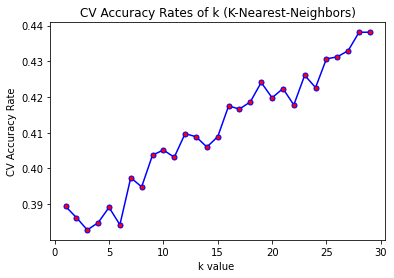

In [ ]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [ ]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index+1, 'accuracy = ', value)

best k =  28 accuracy =  0.4381409939729276


# 8. KNN: Model Creation
Creating KNN model from the entrie data set, with the best k found in the previous step.

In [ ]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=3 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=28, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=28)

# 9. KNN: Deploying the model
What are the predicted class labels of the new data (students.xlsx - Sheet1.csv) using the best classification model?

### 9.1 Data Pre-processing for New Data
Is data in "students.xlsx - Sheet1.csv" ready for prediction? If not, fix it first.

In [ ]:
norm_data = pd.concat([transform_num_data,class_target], axis=1, sort=False)
norm_data.head()

,School_group,Major_cat,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Family_type,Recieve_care,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,Learning_style_1,...,Major_แพทยศาตร์บัณฑิต,Major_แพทยศาสตร์,Major_แพทยศาสตร์บัณฑิต,Major_แพทยืผนจีน,Major_แพทยืแผนไทยประยุกต์,Major_แพทย์,Major_แพทย์ศาสตร์,Major_แพทย์แผนจีน,Major_แพทย์แผนไทยประยุก,Major_แพทย์แผนไทยประยุกต์,Major_โลจิสติก,Major_โลจิสติก และ โซ่อุปทาน,Major_โลจิสติกข์และโซ่อุปทาน,Major_โลจิสติกซ์และโซ่อุปทาน,Major_โลจิสติกส์,Major_โลจิสติกส์ และโซ่อุปทาน,Major_โลจิสติกส์เเละโซ่อุปทาน,Major_โลจิสติกส์และซัพพลายเชน,Major_โลจิสติกส์และห่วงโซ่อุปทาน,Major_โลจิสติกส์และโซ่อุปทาน,Major_โลจิสติกและห่วงโซ๋อุปทาน,Major_โลจิสติกและโซ่อุปทาน,Major_โลจีสติกและโซ่อุปทาน,Major_ไม่มี,Major_ไอที,Feel_envi_9_#NULL!,Feel_envi_9_-1,Feel_envi_9_-2,Feel_envi_9_-3,Feel_envi_9_-4,Feel_envi_9_-5,Feel_envi_9_0,Feel_envi_9_1,Feel_envi_9_2,Feel_envi_9_3,Feel_envi_9_4,Feel_envi_9_5,Feel_envi_9_999,Relax_activity_#NULL!,Year
0,1,1.0,2,1,19,5,1,1.50,1,2,1,15000,1,5000,1,2,-5,-5,-5,-4,-3,-5,-5,-5,999,-5,-2,999,-4,999,-5,-5,1,1,0,1,0,0,2.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2
1,1,1.0,2,1,19,5,1,2.36,2,1,1,999,3,6000,1,2,5,5,-4,5,-5,-3,-3,5,5,-4,-5,5,999,999,5,-5,1,1,0,0,0,0,1.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2
2,1,1.0,3,1,20,3,1,2.72,1,2,1,100000,2,15000,1,2,5,5,1,5,2,2,999,999,999,2,2,2,999,999,999,5,1,0,0,0,1,0,1.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3
3,1,1.0,2,1,19,3,1,2.13,1,1,1,999,3,6000,1,2,5,4,3,3,1,0,1,3,999,2,999,3,3,999,999,5,1,1,0,0,0,0,2.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2
4,1,1.0,3,1,21,2,2,2.52,1,2,1,999,3,40000,1,2,5,3,4,4,2,5,2,4,3,2,-3,3,3,999,999,5,1,1,0,1,0,0,1.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3


In [ ]:
norm_data.to_csv('new_students.csv')

In [ ]:
# Predict the class label for new record(s)
X_new = pd.read_csv('new_students.csv')  # (1) read new instances
X_new

,Unnamed: 0,School_group,Major_cat,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Family_type,Recieve_care,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,...,Major_แพทยศาตร์บัณฑิต,Major_แพทยศาสตร์,Major_แพทยศาสตร์บัณฑิต,Major_แพทยืผนจีน,Major_แพทยืแผนไทยประยุกต์,Major_แพทย์,Major_แพทย์ศาสตร์,Major_แพทย์แผนจีน,Major_แพทย์แผนไทยประยุก,Major_แพทย์แผนไทยประยุกต์,Major_โลจิสติก,Major_โลจิสติก และ โซ่อุปทาน,Major_โลจิสติกข์และโซ่อุปทาน,Major_โลจิสติกซ์และโซ่อุปทาน,Major_โลจิสติกส์,Major_โลจิสติกส์ และโซ่อุปทาน,Major_โลจิสติกส์เเละโซ่อุปทาน,Major_โลจิสติกส์และซัพพลายเชน,Major_โลจิสติกส์และห่วงโซ่อุปทาน,Major_โลจิสติกส์และโซ่อุปทาน,Major_โลจิสติกและห่วงโซ๋อุปทาน,Major_โลจิสติกและโซ่อุปทาน,Major_โลจีสติกและโซ่อุปทาน,Major_ไม่มี,Major_ไอที,Feel_envi_9_#NULL!,Feel_envi_9_-1,Feel_envi_9_-2,Feel_envi_9_-3,Feel_envi_9_-4,Feel_envi_9_-5,Feel_envi_9_0,Feel_envi_9_1,Feel_envi_9_2,Feel_envi_9_3,Feel_envi_9_4,Feel_envi_9_5,Feel_envi_9_999,Relax_activity_#NULL!,Year.1
0,0,1,1.0,2,1,19,5,1,1.50,1,2,1,15000,1,5000,1,2,-5,-5,-5,-4,-3,-5,-5,-5,999,-5,-2,999,-4,999,-5,-5,1,1,0,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2
1,1,1,1.0,2,1,19,5,1,2.36,2,1,1,999,3,6000,1,2,5,5,-4,5,-5,-3,-3,5,5,-4,-5,5,999,999,5,-5,1,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2
2,2,1,1.0,3,1,20,3,1,2.72,1,2,1,100000,2,15000,1,2,5,5,1,5,2,2,999,999,999,2,2,2,999,999,999,5,1,0,0,0,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3
3,3,1,1.0,2,1,19,3,1,2.13,1,1,1,999,3,6000,1,2,5,4,3,3,1,0,1,3,999,2,999,3,3,999,999,5,1,1,0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2
4,4,1,1.0,3,1,21,2,2,2.52,1,2,1,999,3,40000,1,2,5,3,4,4,2,5,2,4,3,2,-3,3,3,999,999,5,1,1,0,1,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,3480,4,13.0,3,1,21,7,1,2.40,1,2,1,30000,2,8000,1,2,4,3,2,3,2,3,2,3,3,2,2,3,2,3,3,3,0,0,0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3
3481,3481,4,13.0,4,1,21,1,1,2.57,1,2,1,30000,1,8000,1,2,4,4,4,4,3,3,3,4,3,3,2,3,3,2,3,3,0,0,0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,4
3482,3482,4,13.0,4,1,21,3,2,3.33,1,2,2,999,3,20000,1,2,5,3,4,3,2,2,2,4,999,0,1,-1,-5,3,2,3,0,0,0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4
3483,3483,4,13.0,4,1,21,7,1,3.30,1,2,1,300000,1,10000,1,2,5,5,3,4,-3,-1,-1,3,999,-3,-5,3,3,0,2,3,0,0,0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4


In [ ]:
X_new = X_new.sample(6, random_state = 2)
X_new

,Unnamed: 0,School_group,Major_cat,Year,Gender,Age,Close_friend,Closefriend_inout,GPAX,Health_status,Family_type,Recieve_care,Family_income,Family_income_enough,Studen_income,Student_income_enough,Dormitory,Relation_fam,Relation_friend,Relation_aj,Feel_uni_1,Feel_uni_2,Feel_uni_3,Feel_uni_4,Feel_uni_5,Feel_uni_6,Feel_envi_7,Feel_envi_8,Feel_envi_10,Feel_envi_11,Feel_envi_12,Feel_envi_13,Feel_envi_14,Problem,Problem_study,Problem_love,Problem_adjust,Problem_econ,Problem_other,Attitude,...,Major_แพทยศาตร์บัณฑิต,Major_แพทยศาสตร์,Major_แพทยศาสตร์บัณฑิต,Major_แพทยืผนจีน,Major_แพทยืแผนไทยประยุกต์,Major_แพทย์,Major_แพทย์ศาสตร์,Major_แพทย์แผนจีน,Major_แพทย์แผนไทยประยุก,Major_แพทย์แผนไทยประยุกต์,Major_โลจิสติก,Major_โลจิสติก และ โซ่อุปทาน,Major_โลจิสติกข์และโซ่อุปทาน,Major_โลจิสติกซ์และโซ่อุปทาน,Major_โลจิสติกส์,Major_โลจิสติกส์ และโซ่อุปทาน,Major_โลจิสติกส์เเละโซ่อุปทาน,Major_โลจิสติกส์และซัพพลายเชน,Major_โลจิสติกส์และห่วงโซ่อุปทาน,Major_โลจิสติกส์และโซ่อุปทาน,Major_โลจิสติกและห่วงโซ๋อุปทาน,Major_โลจิสติกและโซ่อุปทาน,Major_โลจีสติกและโซ่อุปทาน,Major_ไม่มี,Major_ไอที,Feel_envi_9_#NULL!,Feel_envi_9_-1,Feel_envi_9_-2,Feel_envi_9_-3,Feel_envi_9_-4,Feel_envi_9_-5,Feel_envi_9_0,Feel_envi_9_1,Feel_envi_9_2,Feel_envi_9_3,Feel_envi_9_4,Feel_envi_9_5,Feel_envi_9_999,Relax_activity_#NULL!,Year.1
2659,2659,4,10.0,3,0,20,40,1,1.72,1,2,1,30000,2,6000,2,2,4,4,3,3,4,3,3,3,3,2,2,2,3,2,5,5,1,1,0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3
418,418,1,1.0,4,0,22,9,1,2.14,2,1,1,30000,2,6000,1,2,5,4,3,3,3,2,3,4,3,4,4,3,4,4,4,4,1,0,0,0,1,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,4
592,592,1,2.0,2,1,19,1,2,2.85,1,2,1,999,3,10000,1,2,5,3,-3,-2,-4,-4,0,0,0,0,-3,0,0,0,0,3,1,1,0,1,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2
62,62,1,1.0,4,1,23,6,2,2.09,1,2,1,999,3,12000,1,2,5,3,2,3,2,2,2,4,2,-3,1,4,5,4,5,5,1,1,1,1,1,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,4
1630,1630,2,5.0,3,1,20,5,1,2.64,1,1,1,20000,2,5000,1,2,5,4,3,4,3,4,3,3,3,4,4,2,2,1,3,4,1,0,0,1,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3
2743,2743,4,10.0,3,1,20,9,1,2.91,1,2,1,60000,2,10000,1,2,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,1,1,1,0,1,0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3


In [ ]:
X_new = X_new.drop(columns=['Year'])

In [ ]:
X_new = X_new.drop(columns=['Year.1'])

###9.2 What are the predicted class labels of the new data using the best classification model?

In [ ]:
X_new = sc.transform(X_new) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
best_knn.predict(X_new) # (3) predict their class lables

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Unnamed: 0
Feature names seen at fit time, yet now missing:
- Year

  warnings.warn(message, FutureWarning)


array([4, 3, 3, 3, 3, 4])